# Transformações Afim

1.  Translação 
2.  Rotação
3.  Escala
4.  Interpolação


In [2]:
import cv2 as cv
print("OpenCV: ", cv.__version__)
import numpy as np
print("numpy: ", np.__version__)
import matplotlib.pyplot as plt
plt.style.use('classic')
#%matplotlib
#%matplotlib notebook
#%matplotlib inline
%matplotlib widget
from skimage.transform import AffineTransform, warp

OpenCV:  4.7.0
numpy:  1.24.2


(1086, 663, 3)


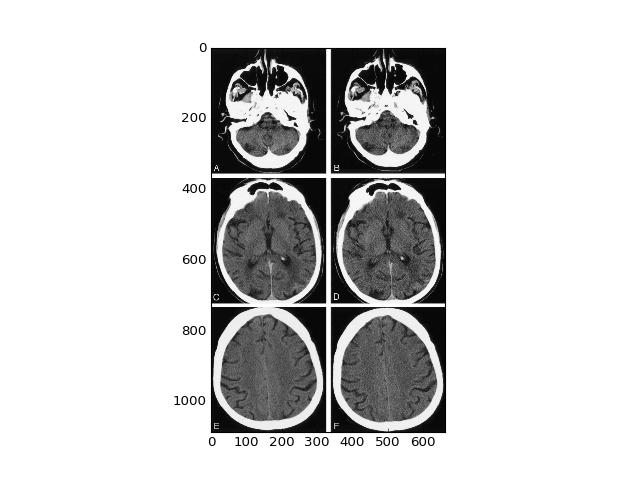

In [3]:
img = cv.imread('Imagens/image1.png')
print(img.shape)
fig = plt.figure()
ax = plt.axes()
ax.imshow(img, 'gray')

In [4]:
# Converting the image to grayscale.
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

Uma transformação afim é uma transformação geométrica que preserva pontos, linhas e planos. De modo geral ela satisfaz as seguintes condições:

* Colinearidade: Os pontos que estão em uma linha antes da transformação continuam a estar na linha após a transformação.

* Paralelismo: Linhas paralelas continuarão paralelas após a transformação.

* Convexidade: Um conjunto convexo continuará a ser convexo após a transformação.

* Proporções de segmentos de linhas paralelas: A proporção do comprimento dos segmentos de linhas paralelas continuará a ser a mesma após a transformação.

A transformação afim é aplicada da seguinte forma:

* Considere cada coordenada de pixel na imagem.

* Calcule o produto escalar da coordenada de pixel com uma matriz de transformação. A matriz difere dependendo do tipo de transformação que está sendo realizada, o que será discutido a seguir. O produto escalar fornece a coordenada de pixel para a imagem transformada.

* Determine o valor do pixel na imagem transformada usando a coordenada de pixel calculada na etapa anterior. Como o produto escalar pode produzir coordenadas de pixel não inteiras, aplicaremos a interpolação (discutida posteriormente).

In [ ]:
help(AffineTransform) 

In [ ]:
help(warp)

In [ ]:
help(cv.warpAffine)

### Translação

A translação é o processo de deslocamento da imagem ao longo dos vários eixos (eixos x, y e z). Para uma imagem 2D, podemos realizar translação ao longo de um ou ambos os eixos de forma independente. A matriz de transformação para translação é definida como:

In [7]:
# Dislocamento em cada direção
dx = 5
dy = 3 
T = np.array([[1, 0, 0], [0, 1, 0], [dx, dy, 1]])
print(T)

[[1 0 0]
 [0 1 0]
 [5 3 1]]


<AffineTransform(matrix=
    [[  1.,  -0., 100.],
     [  0.,   1.,  40.],
     [  0.,   0.,   1.]])>


(-0.5, 662.5, 1085.5, -0.5)

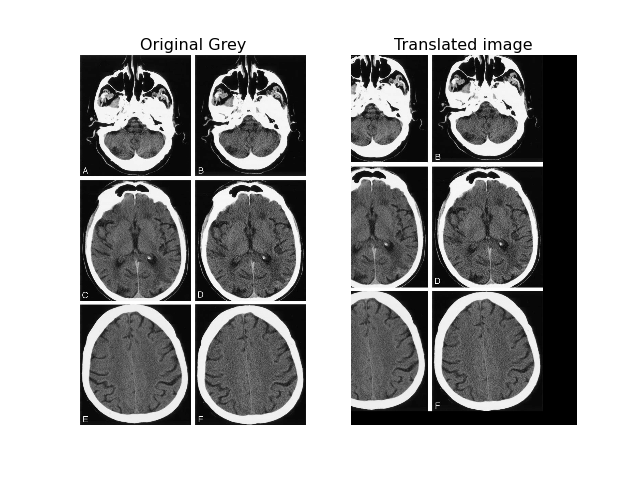

In [8]:
#Translação 
# translate by 10 pixels in x and 4 pixels in y
transformation = AffineTransform(translation=(100, 40))
imgTrans = warp(imgG, transformation)

print(transformation)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgTrans, cmap='gray')
ax[1].set_title('Translated image')
ax[1].axis('off')

[[  1.   0. 100.]
 [  0.   1.  40.]]


(-0.5, 662.5, 1085.5, -0.5)

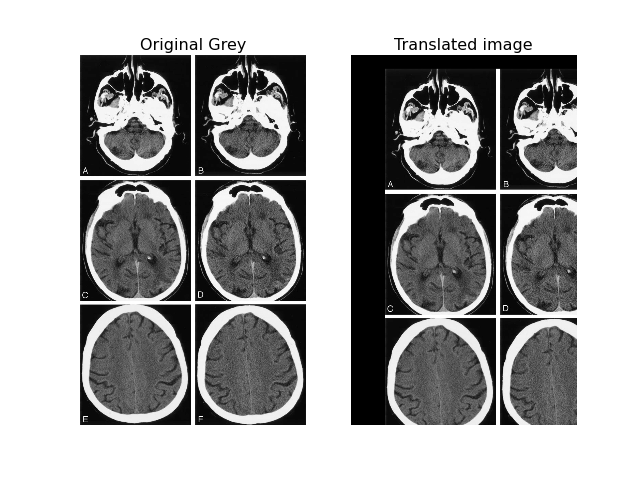

In [10]:
rows,cols = imgG.shape
M = np.float32([[1,0,100],[0,1,40]])
imgTrans = cv.warpAffine(imgG,M,(cols,rows))

print(M)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgTrans, cmap='gray')
ax[1].set_title('Translated image')
ax[1].axis('off')

# Rotação
A rotação é o processo de alterar a orientação radial de uma imagem ao longo dos vários eixos em relação a um ponto fixo.

<AffineTransform(matrix=
    [[ 0.99500417, -0.09983342,  0.        ],
     [ 0.09983342,  0.99500417,  0.        ],
     [ 0.        ,  0.        ,  1.        ]])>


(-0.5, 662.5, 1085.5, -0.5)

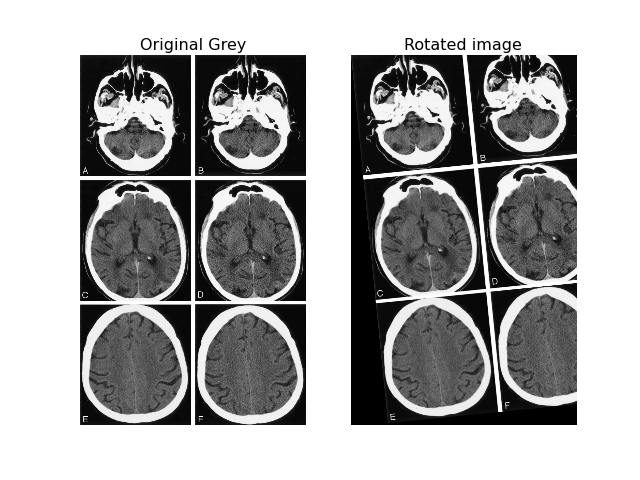

In [13]:
#Rotação
# rotation angle in radians
transformation = AffineTransform(rotation=0.1)
imgRot = warp(imgG, transformation)

print(transformation)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgRot, cmap='gray')
ax[1].set_title('Rotated image')
ax[1].axis('off')

[[   0.70710678    0.70710678 -286.65777337]
 [  -0.70710678    0.70710678  392.94691578]]


(-0.5, 662.5, 1085.5, -0.5)

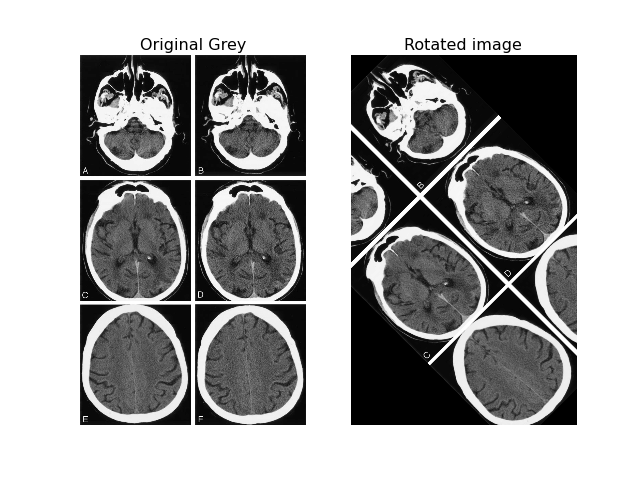

In [20]:
rows,cols = imgG.shape
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
#M = transformation.params
#M = M[:2, :]
imgRot = cv.warpAffine(imgG,M,(cols,rows))
#imgRot = cv.warpAffine(imgG,M, (0,0))
print(M)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
ax[0].axis('off')
ax[1].imshow(imgRot, cmap='gray')
ax[1].set_title('Rotated image')
ax[1].axis('off')

# Escala

Escalar uma imagem é um processo de alteração da distância (compressão ou alongamento) entre pontos em um ou mais eixos. Essa mudança na distância faz com que o objeto na imagem pareça maior ou menor do que a entrada original. O fator de escala pode ser diferente em diferentes eixos.

<AffineTransform(matrix=
    [[ 0.5, -0. ,  0. ],
     [ 0. ,  0.5,  0. ],
     [ 0. ,  0. ,  1. ]])>


Text(0.5, 1.0, 'Scaled image')

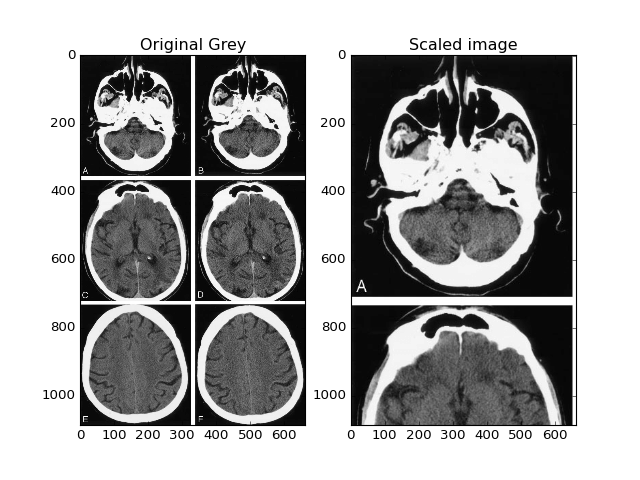

In [21]:
#Escala
# scale by 1/2 on both x and y.
transformation = AffineTransform(scale=(0.5, 0.5))
imgScale = warp(imgG, transformation)

print(transformation)

fig, ax = plt.subplots(1,2)
ax[0].imshow(imgG, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Grey')
#ax[0].axis('off')
ax[1].imshow(imgScale, cmap='gray')
ax[1].set_title('Scaled image')
#ax[1].axis('off')

Text(0.5, 1.0, 'Scaled image')

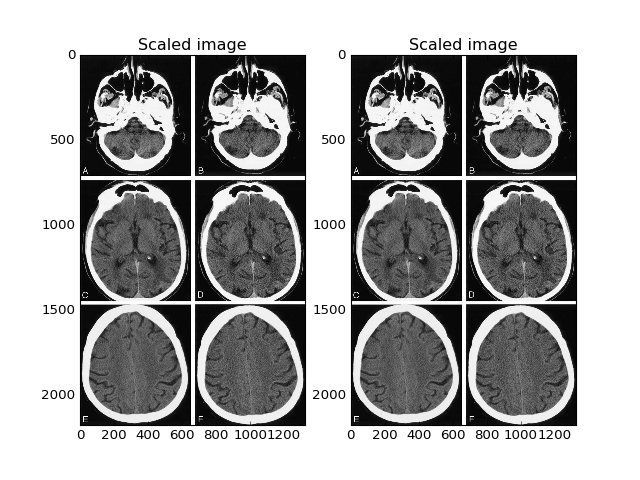

In [22]:
imgScale1 = cv.resize(imgG,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
#OR
height, width = img.shape[:2]
imgScale2 = cv.resize(imgG,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgScale1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Scaled image')
#ax[0].axis('off')
ax[1].imshow(imgScale2, cmap='gray')
ax[1].set_title('Scaled image')
#ax[1].axis('off')

# Interpolação

Para entender o uso da interpolação, primeiro faremos um experimento mental. Considere uma imagem de tamanho 2x2. Se esta imagem for dimensionada para quatro vezes o seu tamanho em todas as dimensões lineares, a nova imagem terá o tamanho 8x8. A imagem original tem apenas 4 valores de pixel, enquanto a nova imagem precisa de 64 valores de pixel. A questão é: como podemos preencher 64 pixels com valores, dado que existem apenas 4 valores? A resposta é interpolação.

Os vários esquemas de interpolação disponíveis são:

1. Vizinho mais próximo (ordem = 0)
2. Bilinear (ordem = 1)
3. Biquadrático (ordem = 2)
4. Bicúbico (ordem = 3)
5. Biquártico (ordem = 4)
6. Biquíntico (ordem = 5)

Na interpolação do vizinho mais próximo,a o valor do pixel ausente é determinado com base em seus vizinhos imediatos. Para um fator de escala grande, como 2, atribuiremos 4 vizinhos na imagem de saída ao mesmo valor de pixel que um dos pixels na imagem de entrada, fazendo com que a imagem de saída pareça pixelada. Não é recomendável usar essa interpolação, embora seja a mais fácil de implementar e também a mais rápida.

Na interpolação bilinear, os valores dos pixels ausentes são determinados com base em 2x2 pixels ao redor dos pixels ausentes. Isso resulta em uma imagem suavizada com menos artefatos em comparação com a interpolação do vizinho mais próximo. Como a interpolação do vizinho mais próximo não produz uma imagem de boa qualidade em comparação com outras interpolações, é recomendável usar pelo menos bilinear. No scikit-image, bi-linear é a interpolação padrão.

Na interpolação biquadrática, os valores de pixel ausentes são determinados com base em 3x3 pixels ao redor dos pixels ausentes, enquanto na interpolação bicúbica, os valores de pixel ausentes são determinados com base em 4x4 pixels ao redor dos pixels ausentes. Isso resulta em uma imagem suavizada com menos artefatos em comparação com a interpolação bilinear, mas com um custo computacional maior.

As outras duas interpolações biquárticas e biquínticas resultam em uma interpolação mais suave, mas com maior custo computacional.

(-0.5, 662.5, 1085.5, -0.5)

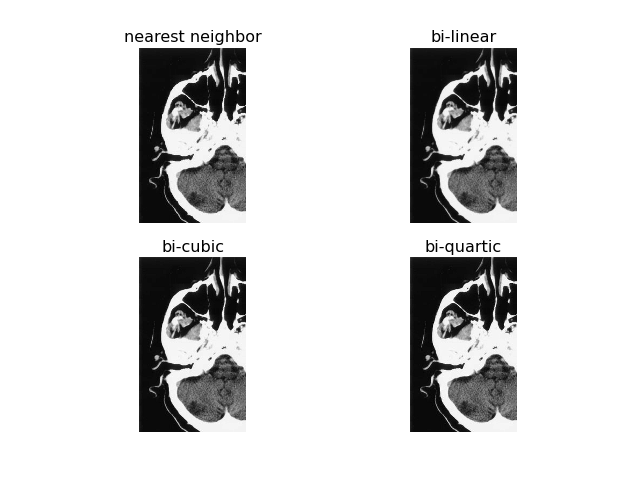

In [23]:
#Interpolação
transformation = AffineTransform(scale=(0.3, 0.3))
# nearest neighbor order = 0
imgScale3 = warp(imgG, transformation, order=0)
# bi-linear order = 1
imgScale4 = warp(imgG, transformation, order=1) # default
#bi-quadratic order = 2
imgScale5 = warp(imgG, transformation, order=3)
#bi-cubic order = 3
imgScale6 = warp(imgG, transformation, order=4)

fig, ax = plt.subplots(2,2)
ax[0, 0].imshow(imgScale3, cmap='gray')
ax[0, 0].set_title('nearest neighbor')
ax[0, 0].axis('off')
ax[0, 1].imshow(imgScale4, cmap='gray')
ax[0, 1].set_title('bi-linear')
ax[0, 1].axis('off')
ax[1, 0].imshow(imgScale5, cmap='gray')
ax[1, 0].set_title('bi-cubic')
ax[1, 0].axis('off')
ax[1, 1].imshow(imgScale6, cmap='gray')
ax[1, 1].set_title('bi-quartic')
ax[1, 1].axis('off')


In [25]:
imgScale0 = cv.resize(imgG,None,fx=2, fy=2, interpolation = cv.INTER_NEAREST)
imgScale1 = cv.resize(imgG,None,fx=2, fy=2, interpolation = cv.INTER_LINEAR)
imgScale2 = cv.resize(imgG,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
imgScale3 = cv.resize(imgG,None,fx=2, fy=2, interpolation = cv.INTER_AREA)

fig, ax = plt.subplots(2,2)
ax[0, 0].imshow(imgScale0, cmap='gray')
ax[0, 0].set_title('nearest neighbor')
ax[0, 0].axis('off')
ax[0, 1].imshow(imgScale1, cmap='gray')
ax[0, 1].set_title('bi-linear')
ax[0, 1].axis('off')
ax[1, 0].imshow(imgScale2, cmap='gray')
ax[1, 0].set_title('bi-cubic')
ax[1, 0].axis('off')
ax[1, 1].imshow(imgScale3, cmap='gray')
ax[1, 1].set_title('bi-quartic')
ax[1, 1].axis('off')

(-0.5, 1325.5, 2171.5, -0.5)